Library Import

In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Setting up Path

In [2]:
from pathlib import Path
x  = 'C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train'
path = Path(x)
path.ls()

(#6) [Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/buildings'),Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/forest'),Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/glacier'),Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/mountain'),Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/sea'),Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/street')]

Data Loading For training

In [3]:
from fastai.vision.data import ImageDataLoaders

In [6]:
# np.random.seed(40)
# data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
#                                   ds_tfms=get_transforms(), size=224,
#                                   num_workers=4).normalize(imagenet_stats)

[Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/buildings'), Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/forest'), Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/glacier'), Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/mountain'), Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/sea'), Path('C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train/street')]


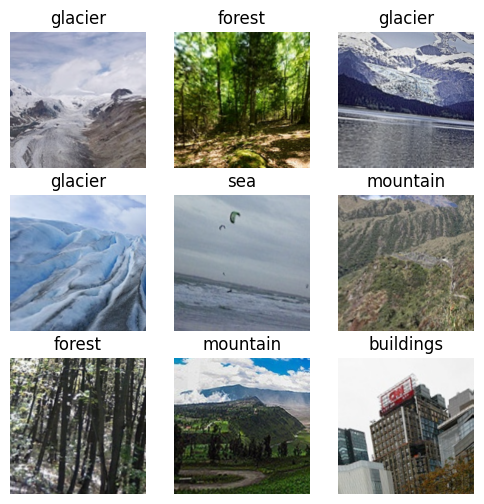

In [7]:
from fastai.vision.all import *
from pathlib import Path

# Define dataset path
path = Path("C:/Users/larai/Downloads/image_classification/archive/seg_train/seg_train")

# Print directory structure (optional)
print(path.ls())

# Create ImageDataLoaders (FastAI v2 syntax)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2,
                                    item_tfms=Resize(224),  # Resize images
                                    batch_tfms=aug_transforms() + [Normalize.from_stats(*imagenet_stats)],  
                                    num_workers=4)

# Show sample images (optional)
data.show_batch(max_n=9, figsize=(6,6))


In [8]:
print(data.vocab)
len(data.vocab)
data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

c:\Users\larai\Downloads\image_classification\image_classification\lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


c:\Users\larai\Downloads\image_classification\image_classification\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f

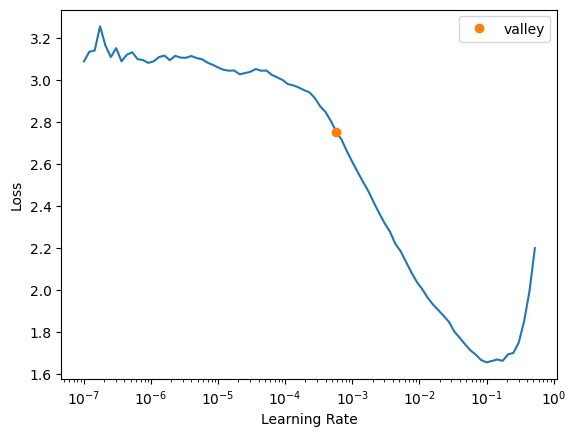

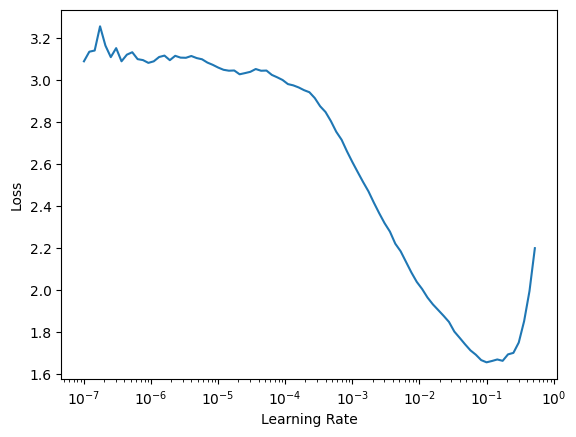

In [10]:
learn.lr_find()
learn.recorder.plot_lr_find()

In [11]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.441629,0.321598,0.897719,02:24
1,0.408550,0.292545,0.908411,01:54
2,0.369614,0.238310,0.916964,01:41
3,0.357829,0.283503,0.908767,01:36
4,0.509568,0.901890,0.842837,01:35
5,0.657193,0.914101,0.848182,01:42
6,0.812360,1.016446,0.872060,01:42
7,1.005005,0.902939,0.905203,14:51
8,0.986147,0.533764,0.908767,01:28
9,1.439986,1.390067,0.862438,01:15


In [13]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 2050
Using device: cuda


In [14]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.154082,0.682646,0.928368,03:14
1,0.185500,1.176986,0.914113,04:10
2,0.201858,0.319098,0.914825,03:50
3,0.240695,0.338065,0.907341,01:56
4,0.228463,0.265860,0.918389,01:58
5,0.204420,0.243886,0.919815,02:05
6,0.192240,1.003199,0.928724,01:59
7,0.174799,6.201746,0.903421,02:11
8,0.178726,0.295958,0.923378,01:57
9,0.136656,0.520082,0.927299,01:47


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

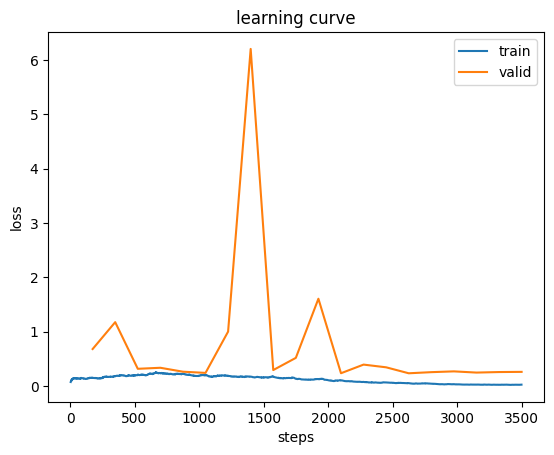

In [16]:
learn.recorder.plot_loss()

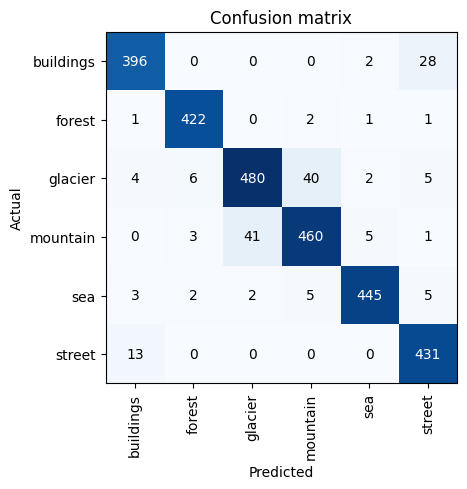

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

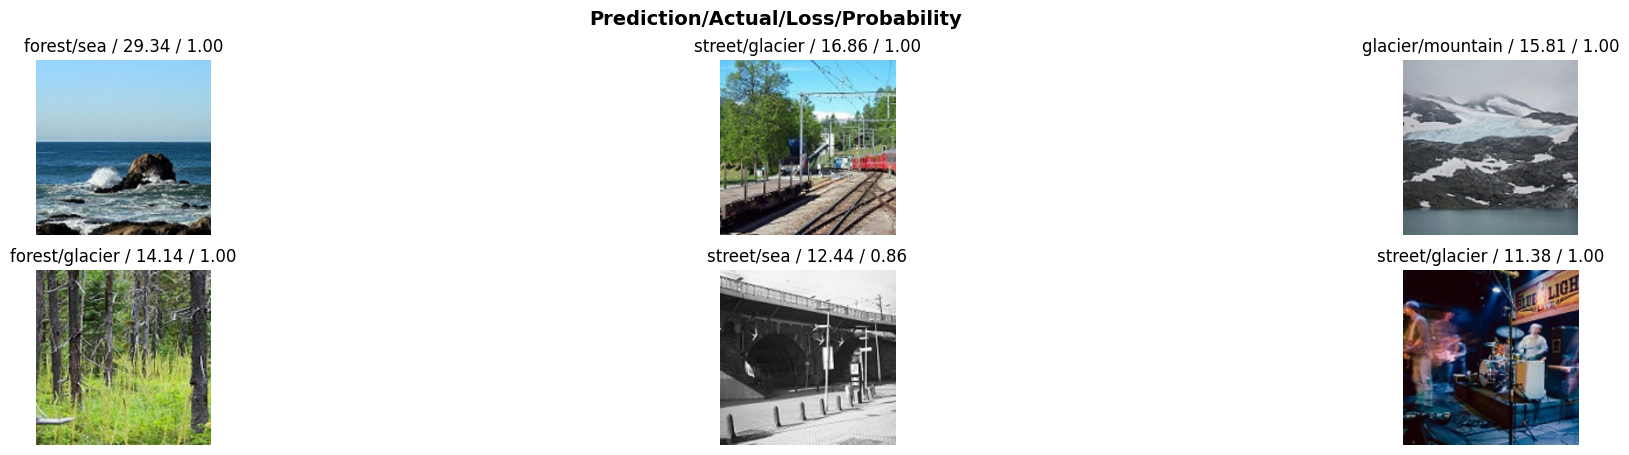

In [18]:
interp.plot_top_losses(6,figsize = (25,5))

In [25]:
img = PILImage.create('C:/Users/larai/Downloads/image_classification/archive/seg_test/seg_test/buildings/24119.jpg')
print(learn.predict(img)[0])

buildings


In [23]:
learn.export(fname = Path("C:/Users/larai/Downloads/image_classification/models/export.pkl"))
learn.model_dir = "C:/Users/larai/Downloads/image_classification/models"
learn.save("stage-1")

Path('C:/Users/larai/Downloads/image_classification/models/stage-1.pth')

In [5]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')